In [ ]:
#!pip install pmdarima

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv("valeurs_mensuelles.csv", delimiter = ';')
df.head()

,Libellé,idBank,Dernière mise à jour,Période,1990-01,1990-02,1990-03,1990-04,1990-05,1990-06,...,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05
0,Acier merchant bar - Indice en euros - Base 20...,1743680.0,31/10/2017 08:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Codes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fioul lourd (Rotterdam) - CAF + Taxe Intérieur...,1711382.0,31/10/2017 08:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Codes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Cours des matières premières importées - Huile...,10002056.0,20/11/2018 10:44,NaN,545.8,564.7,573.7,565.7,577.1,568.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from pandas.core.tools.datetimes import to_datetime

data = df.iloc[[44]]
data = data.drop(['Libellé', 'idBank', 'Dernière mise à jour', 'Période'], axis=1)
data.columns = to_datetime(data.columns)

data

,1990-01-01,1990-02-01,1990-03-01,1990-04-01,1990-05-01,1990-06-01,1990-07-01,1990-08-01,1990-09-01,1990-10-01,...,2021-08-01,2021-09-01,2021-10-01,2021-11-01,2021-12-01,2022-01-01,2022-02-01,2022-03-01,2022-04-01,2022-05-01
44,1533.0,1454.7,1567.9,1521.4,1527.4,1566.3,1571.4,1783.3,2066.4,1945.8,...,2610.6,2839.2,2954.5,2640.7,2694.4,3002.2,3259.7,3536.7,3255.6,2825.5


In [ ]:
data.index = [0]
cours = data.values[0]
temps = data.columns
print(len(cours))
print(len(temps))

389
389


In [ ]:
d = {'cours Al (LME)': data.values[0]}
ts = pd.DataFrame(data=d, index=data.columns)
ts['cours Al (LME)'] = pd.to_numeric(ts['cours Al (LME)'])
ts

,cours Al (LME)
1990-01-01,1533.0
1990-02-01,1454.7
1990-03-01,1567.9
1990-04-01,1521.4
1990-05-01,1527.4
...,...
2022-01-01,3002.2
2022-02-01,3259.7
2022-03-01,3536.7
2022-04-01,3255.6


In [ ]:
ts_test = ts[380:]
ts_train = ts[:380]
ts_test

,cours Al (LME)
2021-09-01,2839.2
2021-10-01,2954.5
2021-11-01,2640.7
2021-12-01,2694.4
2022-01-01,3002.2
2022-02-01,3259.7
2022-03-01,3536.7
2022-04-01,3255.6
2022-05-01,2825.5


In [ ]:
ts_test['cours Al (LME)']['2022-05-01']

2825.5

In [ ]:
ts_train['cours Al (LME)']['2020-05-01':'2021-01-01']

2020-05-01    1459.8
2020-06-01    1564.0
2020-07-01    1639.3
2020-08-01    1733.9
2020-09-01    1745.3
2020-10-01    1802.8
2020-11-01    1932.1
2020-12-01    2017.9
2021-01-01    2003.8
Name: cours Al (LME), dtype: float64

# Stationarity

The best way to understand you stationarity in a Time Series is by eye-balling the plot:

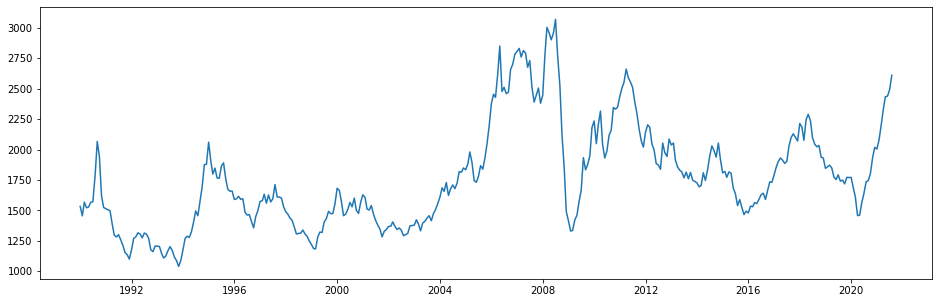

In [ ]:
plt.figure(figsize=(16, 5))
plt.plot(ts_train['cours Al (LME)'])

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
#Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

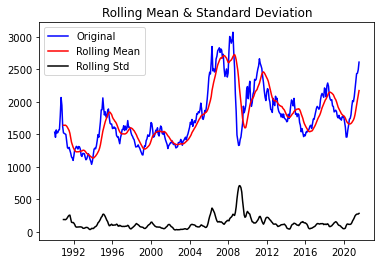

Results of Dickey-Fuller Test:
Test Statistic                  -2.994387
p-value                          0.035422
#Lags Used                       4.000000
Number of Observations Used    375.000000
Critical Value (1%)             -3.447909
Critical Value (5%)             -2.869278
Critical Value (10%)            -2.570892
dtype: float64


In [ ]:
test_stationarity(ts_train)

# Making the time series stationary

There are two major factors that make a time series non-stationary. They are:

• Trend: non-constant mean

• Seasonality: Variation at specific time-frames

The basic idea is to model the trend and seasonality in this series, so we can remove it and make the series stationary. Then we can go ahead and apply statistical forecasting to the stationary series. And finally we can convert the forecasted values into original by applying the trend and seasonality constrains back to those that we previously separated.

The first step is to reduce the trend using transformation, as we can see here that there is a strong positive trend. These transformation can be log, sq-rt, cube root etc . Basically it penalizes larger values more than the smaller. In this case we will use the logarithmic transformation.



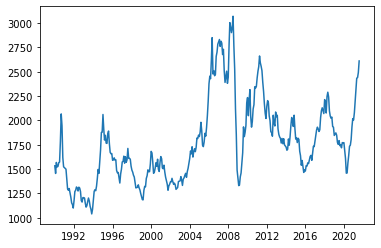

In [ ]:
ts_log = ts_train
plt.plot(ts_log)

# Seasonality (along with Trend)

Previously we saw just trend part of the time series, now we will see both trend and seasonality. Most Time series have trends along with seasonality. There are two common methods to remove trend and seasonality, they are:

• Differencing: by taking difference using time lag

• Decomposition: model both trend and seasonality, then remove them

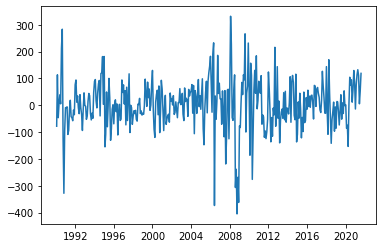

In [ ]:
#Differencing
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

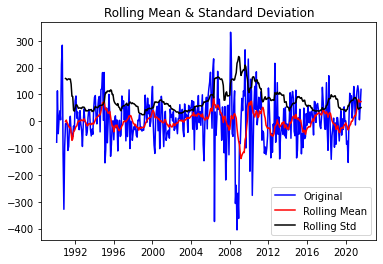

Results of Dickey-Fuller Test:
Test Statistic                -7.730513e+00
p-value                        1.128673e-11
#Lags Used                     6.000000e+00
Number of Observations Used    3.720000e+02
Critical Value (1%)           -3.448052e+00
Critical Value (5%)           -2.869341e+00
Critical Value (10%)          -2.570926e+00
dtype: float64


In [ ]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

It is stationary because:

• the mean and std variations have small variations with time.

• test statistic is less than 10% of the critical values, so we can be 90 % confident that this is stationary.

# Forecasting a Time Series

Now that we have made the Time series stationary, let’s make models on the time series using differencing because it is easy to add the error , trend and seasonality back into predicted values .

We will use statistical modelling method called ARIMA to forecast the data where there are dependencies in the values.

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

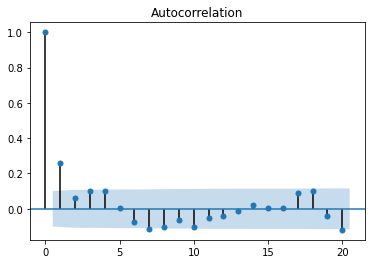

In [ ]:
plot_acf(ts_log_diff,lags=20)
plt.show()

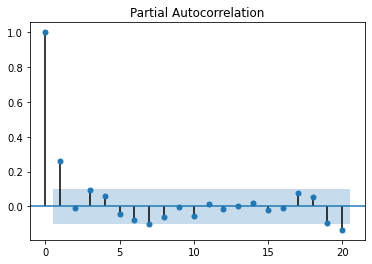

In [ ]:
plot_pacf(ts_log_diff, lags=20, method='ols')
plt.show()

In [ ]:
#!pip install pmdarima

In [ ]:
from pmdarima.arima import auto_arima
#Autoarima gives us bet model suited for the data
# p - number of autoregressive terms (AR)
# q - Number of moving avergae terms (MA)
# d - number of non-seasonal differences
#p, d, q represent non-seasonal components
#P, D, Q represent seasonal components
arima_model = auto_arima(ts_train, start_p = 1, d=1, start_q = 1,
                          max_p = 3, max_q = 3, max_d=2, m = 12,
                          start_P = 0, D=1, start_Q=0, max_P=2, max_D=2, max_Q=2,
                          seasonal = True,
                          trace = True,
                          error_action ='ignore',
                          suppress_warnings = True,
                          stepwise = True, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=4679.581, Time=0.22 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4702.384, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4613.266, Time=0.27 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.48 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=4677.738, Time=0.10 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=4548.972, Time=0.65 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.47 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.89 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=4573.307, Time=0.36 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=4550.972, Time=1.09 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=4550.972, Time=1.12 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=4549.884, Time=0.71 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=inf, Time=3.60 sec
 ARIMA(1,1,0)(2,1,0)[12] intercept   : AIC=4550.694, Time=1.76 sec

Best model:  ARIMA(1,1,0)(2,1,0)[12]  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


447.4897601337428


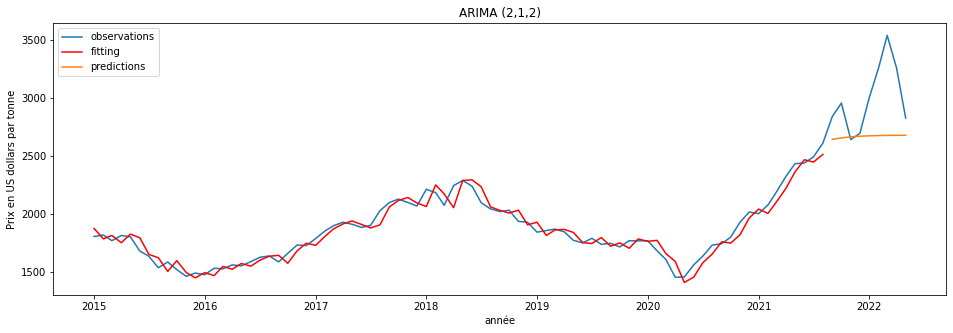

In [ ]:
#ARIMA model
model = ARIMA(ts_log, order = (2,1,2)) # voir cellule précédente
results_ARIMA = model.fit()
prediction_info2 = results_ARIMA.forecast(9)
#predictions2 = prediction_info2[0]
#print(prediction_info2)
plt.figure(figsize=(16, 5))
plt.plot(ts[300:], label = 'observations')
plt.plot(results_ARIMA.fittedvalues[300:], color='r', label = 'fitting')
plt.plot(prediction_info2, label = 'predictions')
plt.xlabel('année')
plt.ylabel('Prix en US dollars par tonne')
plt.legend()
plt.title('ARIMA (2,1,2)')
print(np.sqrt(sum((results_ARIMA.fittedvalues.values-ts_log['cours Al (LME)'].values)**2/len(ts_log.values))+
        sum((prediction_info2.values-ts_test['cours Al (LME)'].values)**2/len(ts_test.values))))

In [ ]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(ts_train,order=(1,1,1),seasonal_order=(1,1,0,12),enforce_stationarity=False,enforce_invertibility=False)
results = mod.fit()
prediction_info3 = results.forecast(9)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


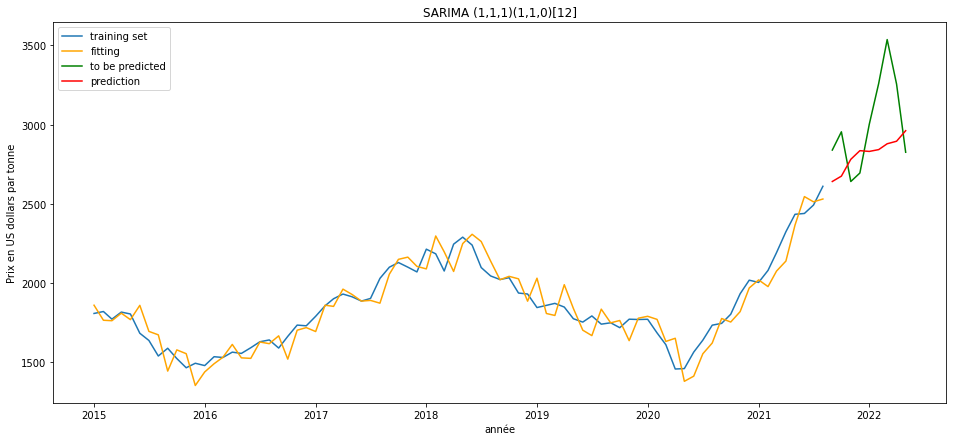

355.7089025512437

In [ ]:
plt.figure(figsize=(16,7))
plt.plot(ts_train[300:], label = 'training set')
plt.plot(results.fittedvalues[300:], color = 'orange', label = 'fitting')

plt.plot(ts_test, color = 'g', label='to be predicted')
plt.plot(ts_test.index, prediction_info3, color = 'r', label='prediction')

#plt.xlabel('date-Hour', fontsize=16)
#plt.ylabel('cours', fontsize=16)
plt.xlabel('année')
plt.ylabel('Prix en US dollars par tonne')
plt.title('SARIMA (1,1,1)(1,1,0)[12]')
plt.legend()
plt.show()
np.sqrt(sum((results.fittedvalues.values-ts_log['cours Al (LME)'].values)**2/len(ts_log.values))+
        sum((prediction_info3.values-ts_test['cours Al (LME)'].values)**2/len(ts_test.values)))

# FINAL STEP: BRINGING THIS BACK TO THE ORIGINAL SCALE

In [ ]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)#choix de la méthode
predictions_ARIMA_diff.head()

1990-02-01     2.929342
1990-03-01   -18.586727
1990-04-01    32.117696
1990-05-01   -16.342769
1990-06-01    10.386869
dtype: float64

In [ ]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

1990-02-01     2.929342
1990-03-01   -15.657385
1990-04-01    16.460311
1990-05-01     0.117542
1990-06-01    10.504410
dtype: float64

In [ ]:
predictions_ARIMA = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA = predictions_ARIMA.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA.head()

1990-01-01          NaN
1990-02-01     2.929342
1990-03-01   -15.657385
1990-04-01    16.460311
1990-05-01     0.117542
dtype: float64

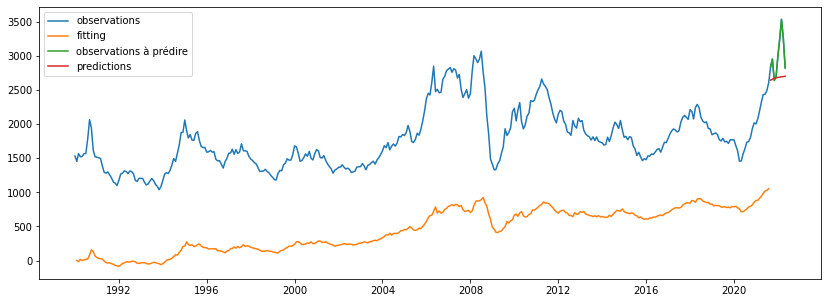

In [ ]:
#predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.figure(figsize=(14, 5))
plt.plot(ts_train, label = 'observations')
plt.plot(predictions_ARIMA, label = 'fitting')
plt.plot(ts_test, label = 'observations à prédire')
plt.plot(ts_test.index, predictions2, label = 'predictions')
#plt.title('RMSE : %.4f' % np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))
plt.legend()

In [ ]:
# holt winters
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
model1 = ExponentialSmoothing(ts_train, trend='mul')
model_fit = model1.fit()
prediction_info3 = model_fit.forecast(9)
#print(prediction_info3)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


281.5207481913806


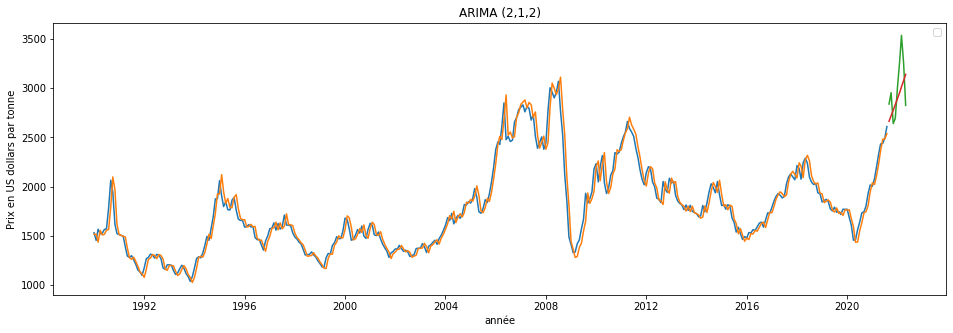

In [ ]:
plt.figure(figsize=(16, 5))
plt.plot(ts_train)
plt.plot(model_fit.fittedvalues)
plt.plot(ts_test)
plt.plot(ts_test.index, prediction_info3)
plt.xlabel('année')
plt.ylabel('Prix en US dollars par tonne')
plt.legend()
plt.title('ARIMA (2,1,2)')
#plt.title('RMSE : %.4f' % np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))
print(np.sqrt(sum((model_fit.fittedvalues.values-ts_log['cours Al (LME)'].values)**2/len(ts_log.values))+
        sum((prediction_info3-ts_test['cours Al (LME)'].values)**2/len(ts_test.values))))

Text(0.5, 1.0, 'Exponential Smoothing')

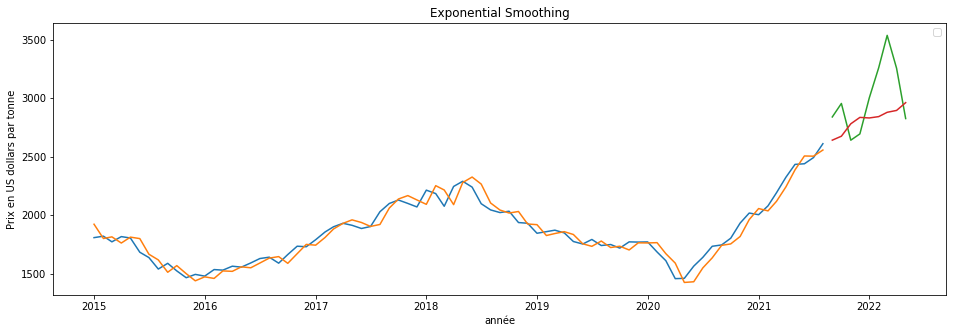

In [ ]:
plt.figure(figsize=(16, 5))
plt.plot(ts_train[300:])
plt.plot(model_fit.fittedvalues[300:])
plt.plot(ts_test)
plt.plot(ts_test.index, prediction_info3)